# 10.3 RANDOM WALK WITH RANDOM WAITING TIMES

Use this notebook to store your work for this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
from scipy.special import binom
from numpy import random
from scipy.stats import norm
import math
from scipy.stats import stats
from scipy.special import beta
from scipy.signal import convolve
from mpl_toolkits import mplot3d
from numpy.random import default_rng

rng = default_rng()
rand = rng.random

## (a)

Text(0.5, 1.0, 'x versus t Graphic')

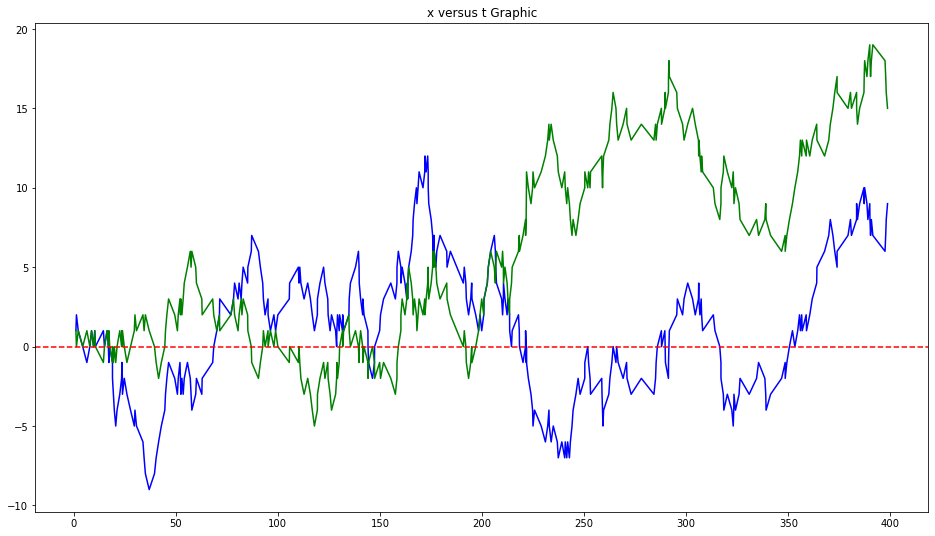

In [42]:
B = 1
rand_num = -((1/B) * np.log(rand(1000))).cumsum()
t = rand_num[(rand_num > 0) * (rand_num < 400)]

num_steps = len(t)
X_rand = 2*(rand(num_steps) < 0.5) - 1
X1 = X_rand.cumsum()

X_rand2 = 2*(rand(num_steps) < 0.5) - 1
X2 = X_rand2.cumsum()

plt.figure(figsize = (16,9))
plt.plot(t, X1, 'b-')
plt.plot(t, X2, 'g-')
plt.axhline(y = 0, color = 'r',linestyle = '--')
plt.title('x versus t Graphic')

## (b)

In [14]:
num_sim = 50
B = 1
end_t = [200,400,600] 
mean = np.zeros(3)
var = np.zeros(3)
endpoints = np.zeros(num_sim)
a = 0
for N in end_t:
    for i in range(num_sim):
        rand_num = -((1/B) * np.log(rand(2*N))).cumsum()
        time = rand_num[(rand_num > 0) * (rand_num < N)]

        num_steps = len(t)
        X_rand = 2*(rand(num_steps) < 0.5) - 1
        X = X_rand.cumsum()
        endpoints[i] = X[-1]
    mean[a] = endpoints.mean()
    var[a] = endpoints.var()
    a = a+1
    
print('mean---> ', mean)
print('variance---> ', var)

mean--->  [-1.44 -0.28 -2.16]
variance--->  [304.6464 490.7216 530.0544]


## (c)

In [1]:
# I believe this was for making an equation of the lines shown in part A.... I sat down and started doing this on a piece of paper trying to use the vairables used in the coding of the graphic but was unclear as it seemed really elaborate and from past questions I felt like I was quickly over thinking it.

## (d)

Text(0.5, 1.0, 'x versus y 2D Graphic')

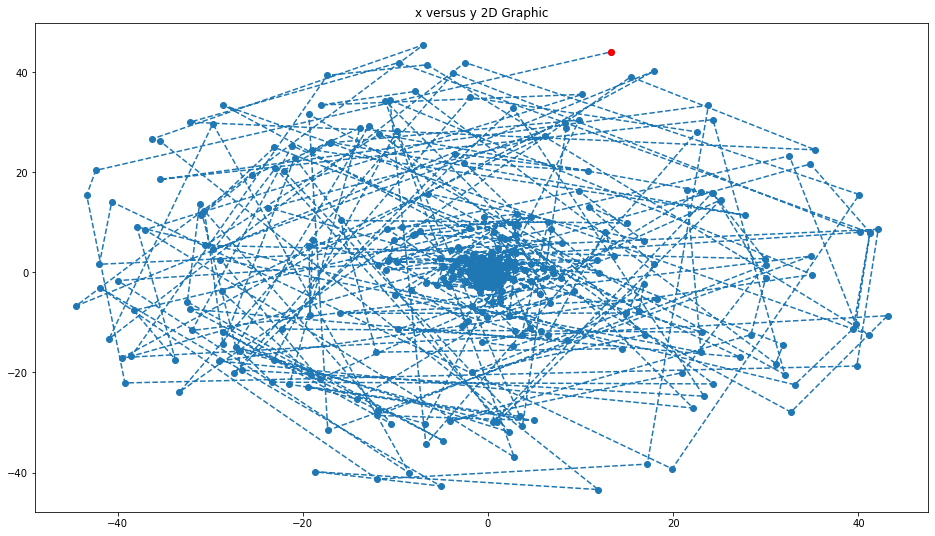

In [15]:
B = 1
rand_num = -((1/B) * np.log(rand(1000))).cumsum()
t = rand_num[(rand_num > 0) * (rand_num < 400)]

num_steps = len(t)
r_rand = 2*(rand(num_steps) < 0.5) - 1
r = r_rand.cumsum()

y_rand = np.random.uniform(0,2,num_steps)
angle = np.pi * y_rand
Y = r * np.sin(angle)
X = r * np.cos(angle)
plt.figure(figsize = (16,9))
plt.plot(X,Y,"--o")
plt.plot(X[-1],Y[-1],'or')
plt.title('x versus y 2D Graphic')

## (e)

NameError: name 'FuncAnimation' is not defined

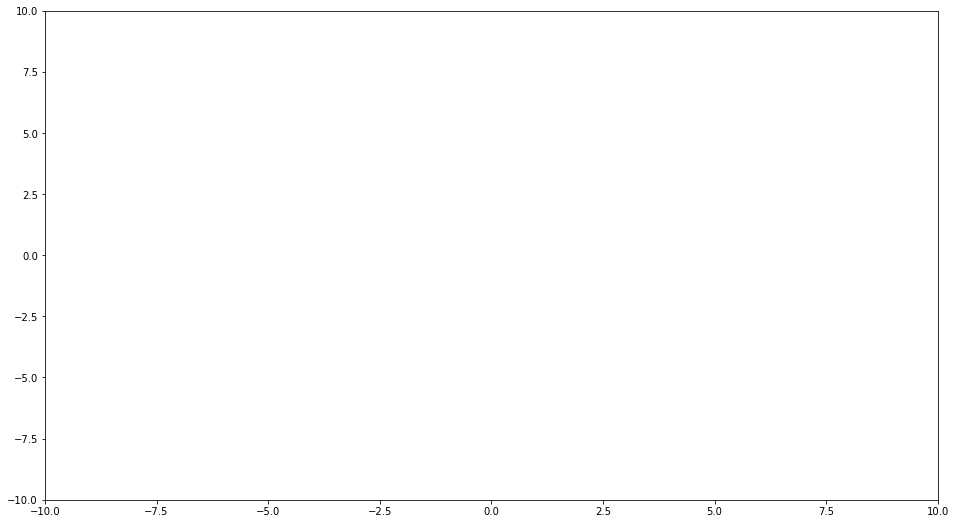

In [16]:
plt.close('all')
bound = 10
fig = plt.figure(figsize=(16,9))
ax = plt.axes(xlim=(-bound,bound),ylim=(-bound,bound))

line, = ax.plot([],[],lw=2)
point, = ax.plot([],[],'ro',ms=9)

def get_step(n,x,y,line2,point2):
    line2.set_data(x[:n+1],y[:n+1])
    point2.set_data(x[n],y[n])
    return line2, point2

anim = FuncAnimation(fig,get_step,frames=num_steps,fargs=(X,Y,line,point))
my_movie.save('random_walk.mp4',fps=30,dpi=300)